<a href="https://colab.research.google.com/github/singhawat29/SCIP513_Deep_Learning/blob/master/HW3_deep_Learning_6537710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from google.colab import drive
import cv2
import pandas as pd
import PIL
import tensorflow as tf
from google.colab.patches import cv2_imshow

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
import tensorflow_datasets as tfds
x_train, y_train = tfds.as_numpy(tfds.load('citrus_leaves',split='train', batch_size=-1, as_supervised=True,))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/594 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/citrus_leaves/0.1.2.incompleteJHRBSC/citrus_leaves-train.tfrecord*...:   0%|  …

Dataset citrus_leaves downloaded and prepared to ~/tensorflow_datasets/citrus_leaves/0.1.2. Subsequent calls will reuse this data.


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/SCIP_deep/HW3/Leaves.zip /content

In [4]:
!unzip /content/Leaves.zip

Archive:  /content/Leaves.zip
   creating: Leaves/Black spot/
  inflating: Leaves/Black spot/74.jpg  
  inflating: Leaves/Black spot/78.jpg  
  inflating: Leaves/Black spot/b (11).png  
  inflating: Leaves/Black spot/b (126).png  
  inflating: Leaves/Black spot/b (131).png  
  inflating: Leaves/Black spot/b (134).png  
  inflating: Leaves/Black spot/b (139).png  
  inflating: Leaves/Black spot/b (14).png  
  inflating: Leaves/Black spot/b (140).png  
  inflating: Leaves/Black spot/b (142).png  
  inflating: Leaves/Black spot/b (144).png  
  inflating: Leaves/Black spot/b (145).png  
  inflating: Leaves/Black spot/b (146).png  
  inflating: Leaves/Black spot/b (148).png  
  inflating: Leaves/Black spot/b (150).png  
  inflating: Leaves/Black spot/b (151).png  
  inflating: Leaves/Black spot/b (152).png  
  inflating: Leaves/Black spot/b (154).png  
  inflating: Leaves/Black spot/b (155).png  
  inflating: Leaves/Black spot/b (156).png  
  inflating: Leaves/Black spot/b (157).png  
  inf

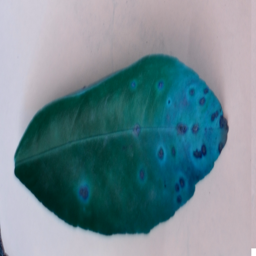

In [ ]:
cv2_imshow(x_train[0])

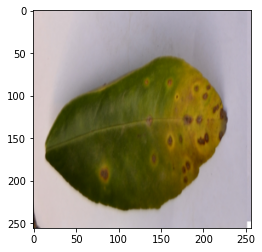

In [ ]:
plt.imshow(x_train[0])

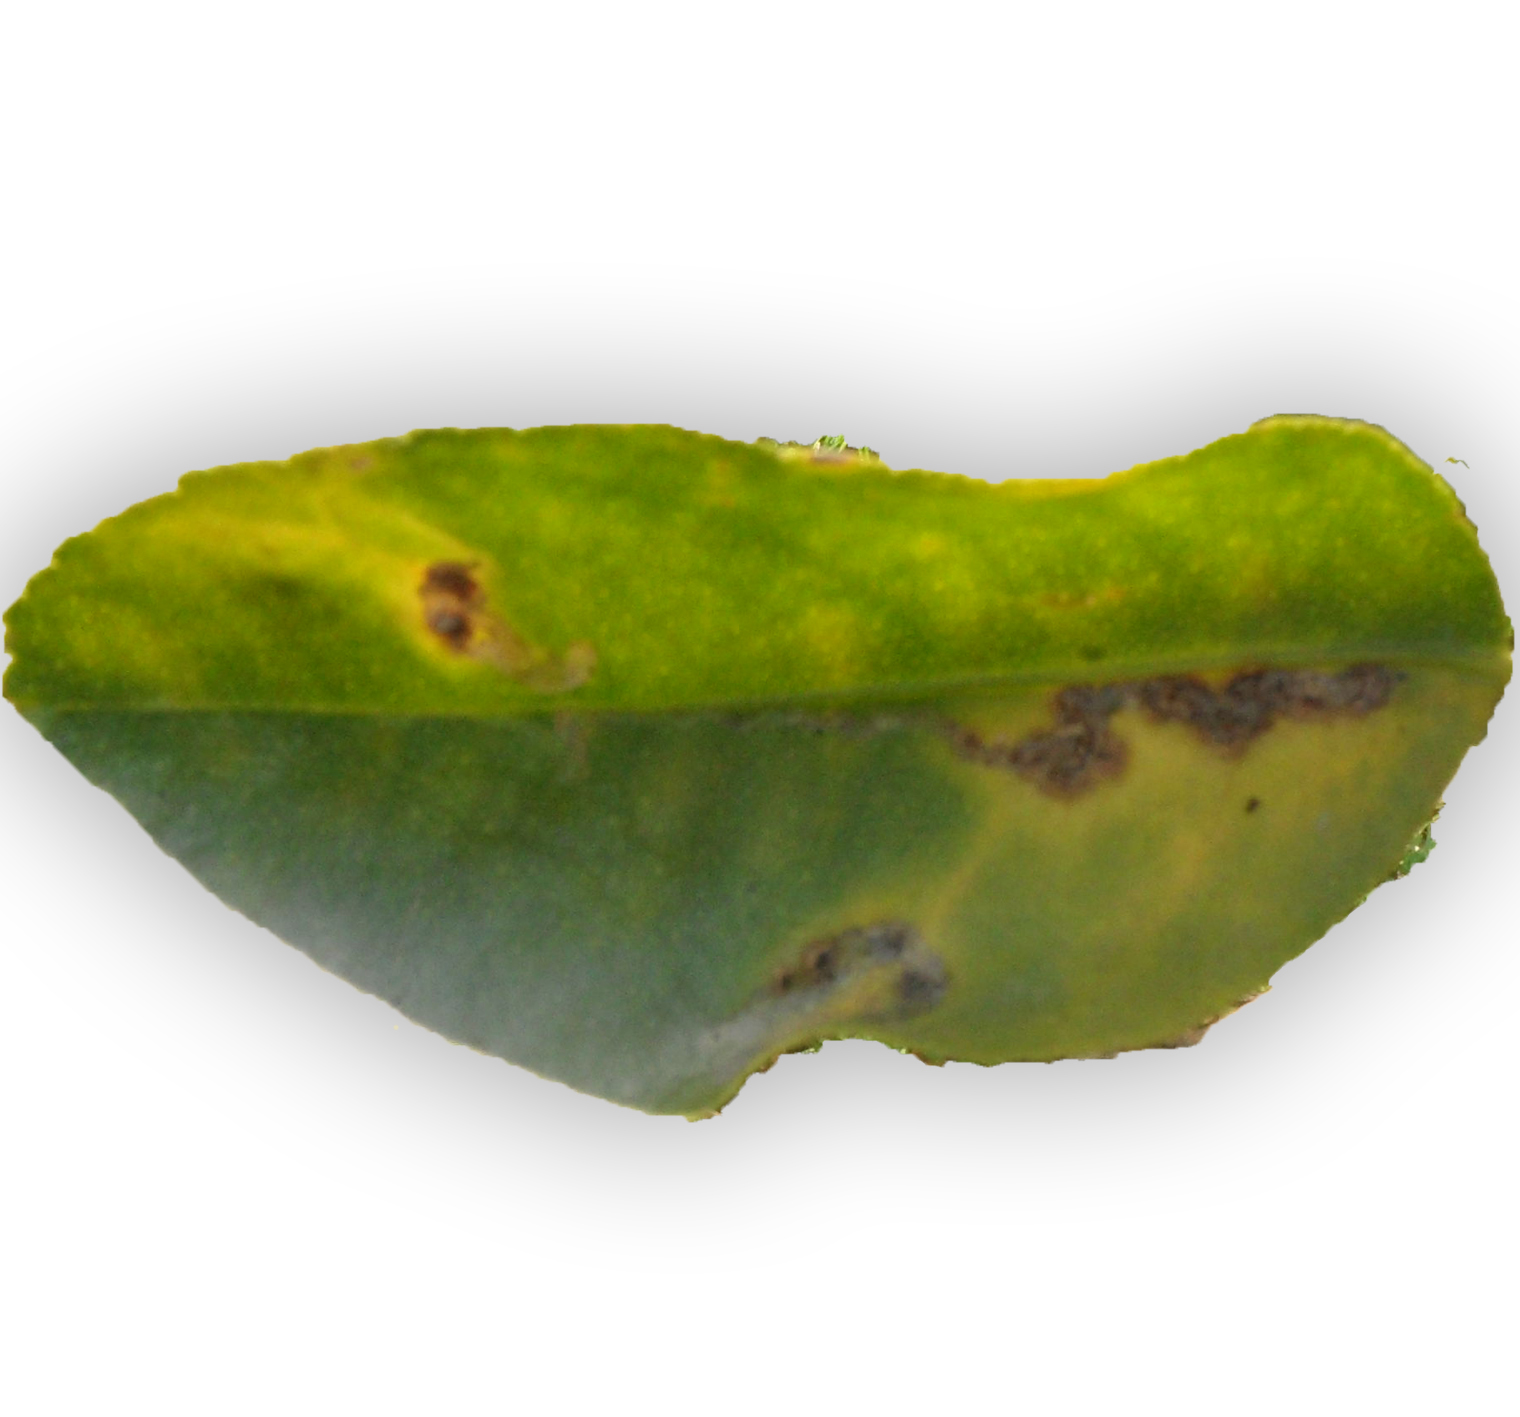

In [ ]:
img = cv2.imread('/content/Leaves/Black spot/74.jpg')
cv2_imshow(img)

In [ ]:
img.shape,img.dtype

((1417, 1520, 3), dtype('uint8'))

In [10]:
batch_size = 20
img_height = 50
img_width = 50

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Leaves',
  validation_split=0.2,
  #label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 596 files belonging to 4 classes.
Using 477 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Leaves',
  validation_split=0.2,
  #label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 596 files belonging to 4 classes.
Using 119 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Black spot', 'canker', 'greening', 'healthy']


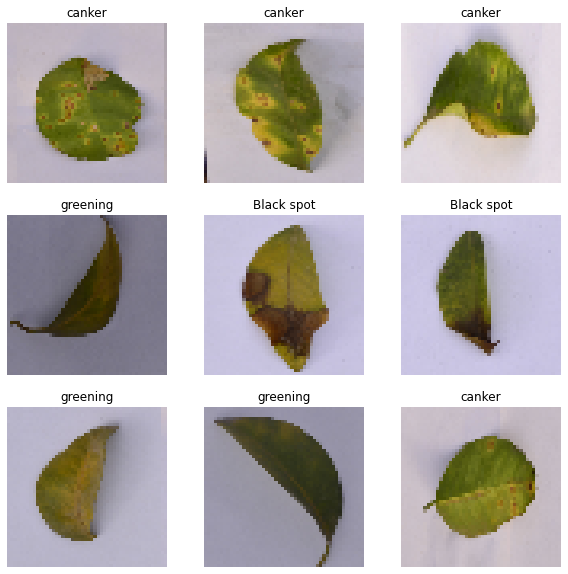

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.15066199 0.8235295


#MLP

In [ ]:
num_classes = len(class_names)

model = Sequential()
model.add(Flatten(input_shape=(img_height, img_width,3)))
model.add(Rescaling(1./255))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(num_classes, activation="softmax"))
#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=[SparseCategoricalAccuracy(name="acc")])
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7500)              0         
                                                                 
 rescaling_2 (Rescaling)     (None, 7500)              0         
                                                                 
 dense_5 (Dense)             (None, 200)               1500200   
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 4)                 804       
                                                                 
Total params: 1,541,204
Trainable params: 1,541,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
15/15 [==============================] - 1s 10ms/step - loss: 1.9478 - accuracy: 0.2935 - val_loss: 2.0175 - val_accuracy: 0.2773
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9471 - accuracy: 0.2956 - val_loss: 2.0169 - val_accuracy: 0.2857
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9466 - accuracy: 0.3019 - val_loss: 2.0164 - val_accuracy: 0.2773
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9461 - accuracy: 0.3124 - val_loss: 2.0159 - val_accuracy: 0.2941
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9456 - accuracy: 0.3166 - val_loss: 2.0155 - val_accuracy: 0.3109
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9453 - accuracy: 0.3270 - val_loss: 2.0152 - val_accuracy: 0.3529
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9449 - accuracy: 0.3249 - val_loss: 2.0148 - val_accuracy: 0.3445
Epoch 8/100


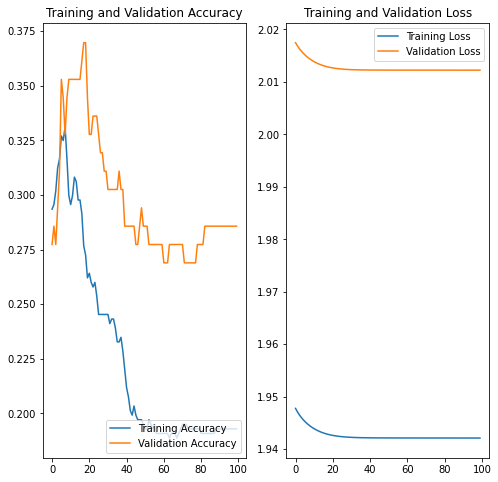

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## MPL from download google drive

In [20]:
batch_size = 10
img_height = 256
img_width = 256

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Leaves',
  validation_split=0.2,
  label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1192 files belonging to 4 classes.
Using 954 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Leaves',
  validation_split=0.2,
  label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1192 files belonging to 4 classes.
Using 238 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['Blackspot', 'canker', 'greening', 'healthy']


In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 256, 256, 3)
(10, 4)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
normalization_layer = layers.Rescaling(1./255)

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8705883


In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing, Dropout
model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Resizing(50,50))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(5250, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 resizing (Resizing)         (None, 50, 50, 3)         0         
                                                                 
 flatten (Flatten)           (None, 7500)              0         
                                                                 
 dropout (Dropout)           (None, 7500)              0         
                                                                 
 dense (Dense)               (None, 5250)              39380250  
                                                                 
 dropout_1 (Dropout)         (None, 5250)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0002,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
),loss="categorical_crossentropy",metrics=["acc"])

In [37]:
epochs=500
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/500
96/96 [==============================] - 1s 15ms/step - loss: 0.6251 - acc: 0.7421 - val_loss: 0.6633 - val_acc: 0.7017
Epoch 2/500
96/96 [==============================] - 1s 14ms/step - loss: 0.6592 - acc: 0.7306 - val_loss: 0.7000 - val_acc: 0.7017
Epoch 3/500
96/96 [==============================] - 1s 15ms/step - loss: 0.5989 - acc: 0.7589 - val_loss: 0.6585 - val_acc: 0.7353
Epoch 4/500
96/96 [==============================] - 1s 14ms/step - loss: 0.6445 - acc: 0.7579 - val_loss: 0.6762 - val_acc: 0.6975
Epoch 5/500
96/96 [==============================] - 1s 14ms/step - loss: 0.6172 - acc: 0.7327 - val_loss: 0.7006 - val_acc: 0.7143
Epoch 6/500
96/96 [==============================] - 1s 14ms/step - loss: 0.6464 - acc: 0.7306 - val_loss: 0.7054 - val_acc: 0.7185
Epoch 7/500
96/96 [==============================] - 1s 14ms/step - loss: 0.6455 - acc: 0.7338 - val_loss: 0.7610 - val_acc: 0.6723
Epoch 8/500
96/96 [==============================] - 1s 14ms/step - loss: 0.

Text(0.5, 1.0, 'Training and Validation Accuracy')

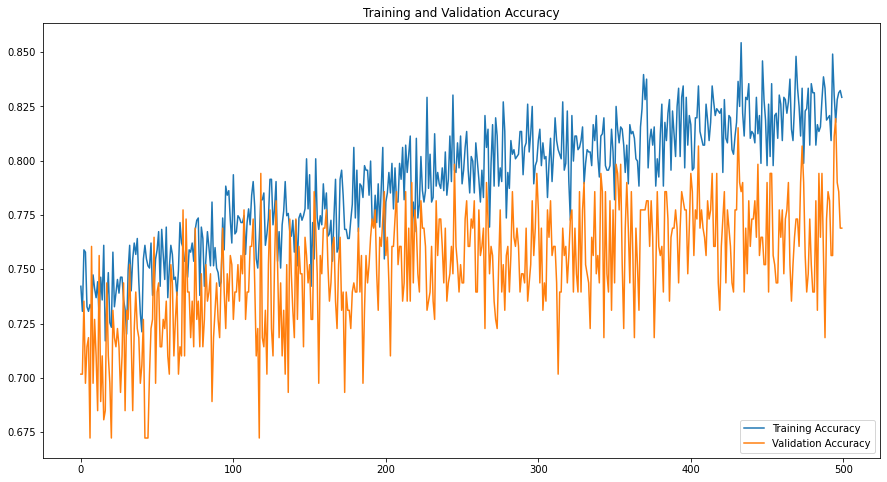

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



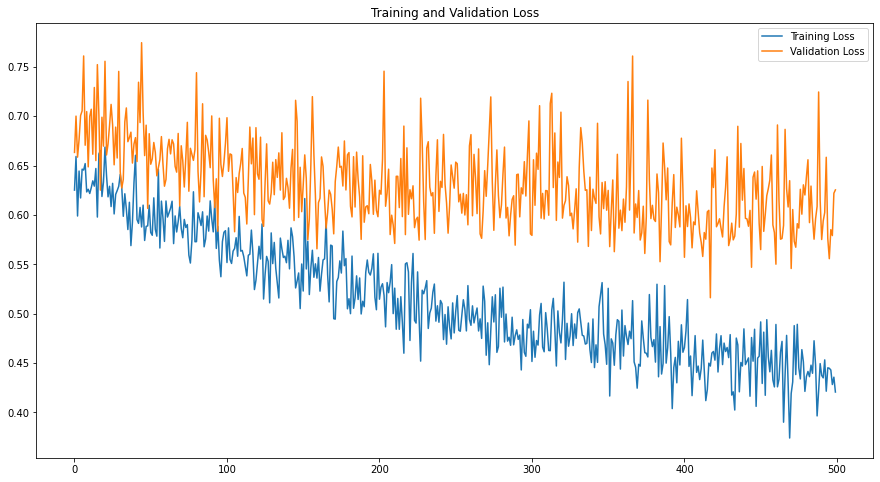

In [45]:
plt.figure(figsize=(15, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#gray 

In [35]:
# Python program to explain os.path.join() method
   
# importing os module
import os
 
# Path
path = "/home"
 
# Join various path components
print(os.path.join(path, "User/Desktop", "file.txt"))
path = "User/Documents"
print(os.path.join(path, "/home", "file.txt"))
path = "/User"
print(os.path.join(path, "Downloads", "file.txt", "/home"))
path = "/home"
print(os.path.join(path, "User/Public/", "Documents", ""))
 


/home/User/Desktop/file.txt
/home/file.txt
/home
/home/User/Public/Documents/


In [5]:
import cv2

import os,glob

from os import listdir,makedirs

from os.path import isfile,join
for i in ['Black spot','canker','greening','healthy']:
  path = '/content/Leaves/' + i # Source Folder
  dstpath = '/content/gray/' + i # Destination Folder
  try:
      makedirs(dstpath)
  except:
      print ("Directory already exist, images will be written in same folder")
  # Folder won't used
  files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
  for image in files:
      try:
          img = cv2.imread(os.path.join(path,image))
          gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
          dstPath = join(dstpath,'gray_'+image)
          cv2.imwrite(dstPath,gray)
      except:
          print ("{} is not converted".format(image))
  for fil in glob.glob("*.jpg"):
      try:
          image = cv2.imread(fil) 
          gray_image = cv2.cvtColor(os.path.join(path,image), cv2.COLOR_BGR2GRAY) # convert to greyscale
          cv2.imwrite(os.path.join(dstpath,fil),gray_image)
      except:
          print('{} is not converted')

In [19]:
!rm -r /content/Leaves/.ipynb_checkpoints

In [10]:
!cp /content/gray/Blackspot/* /content/Leaves/Blackspot

In [11]:
!cp /content/gray/canker/* /content/Leaves/canker

In [12]:
!cp /content/gray/greening/* /content/Leaves/greening

In [13]:
!cp /content/gray/healthy/* /content/Leaves/healthy

In [ ]:
batch_size = 10
img_height = 50
img_width = 50

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/gray',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 596 files belonging to 4 classes.
Using 477 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/gray',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 596 files belonging to 4 classes.
Using 119 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Black spot', 'canker', 'greening', 'healthy']


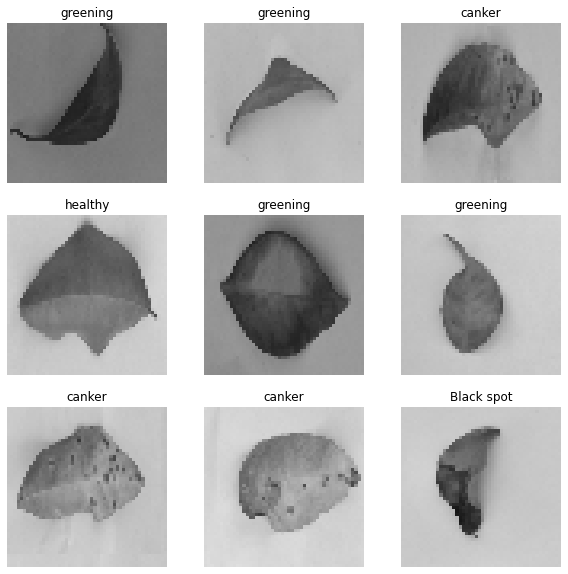

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 50, 50, 3)
(10,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

NameError: ignored

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing, Rescaling
model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Resizing(100,100))
model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 resizing_13 (Resizing)      (None, 100, 100, 3)       0         
                                                                 
 flatten_14 (Flatten)        (None, 30000)             0         
                                                                 
 dense_84 (Dense)            (None, 100)               3000100   
                                                                 
 dense_85 (Dense)            (None, 100)               10100     
                                                                 
 dense_86 (Dense)            (None, 4)                 404       
                                                                 
Total params: 3,010,604
Trainable params: 3,010,604
N

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
48/48 [==============================] - 1s 20ms/step - loss: 1.9447 - accuracy: 0.2390 - val_loss: 2.0126 - val_accuracy: 0.2017
Epoch 2/100
48/48 [==============================] - 1s 16ms/step - loss: 1.9425 - accuracy: 0.2432 - val_loss: 2.0126 - val_accuracy: 0.2185
Epoch 3/100
48/48 [==============================] - 1s 17ms/step - loss: 1.9424 - accuracy: 0.2474 - val_loss: 2.0125 - val_accuracy: 0.2353
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 1.9424 - accuracy: 0.2495 - val_loss: 2.0125 - val_accuracy: 0.2269
Epoch 5/100
48/48 [==============================] - 1s 17ms/step - loss: 1.9424 - accuracy: 0.2516 - val_loss: 2.0125 - val_accuracy: 0.2353
Epoch 6/100
48/48 [==============================] - 1s 17ms/step - loss: 1.9424 - accuracy: 0.2579 - val_loss: 2.0125 - val_accuracy: 0.2353
Epoch 7/100
48/48 [==============================] - 1s 17ms/step - loss: 1.9423 - accuracy: 0.2621 - val_loss: 2.0125 - val_accuracy: 0.2353
Epoch 

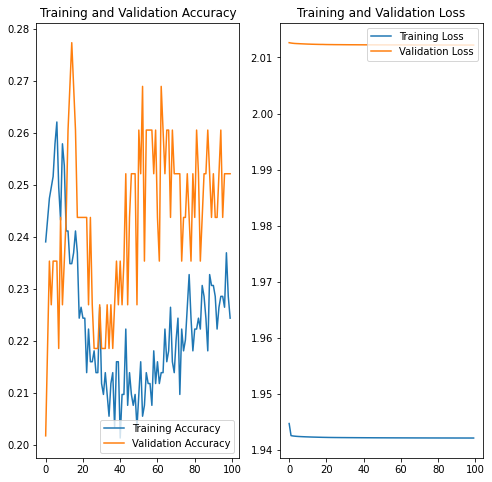

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#MLP fromclass

In [ ]:
x_train, y_train = tfds.as_numpy(tfds.load('citrus_leaves',split='train', batch_size=-1, as_supervised=True,))

In [ ]:
x_train.shape,y_train.shape

((594, 256, 256, 3), (594,))

In [ ]:
img2 = cv2.resize(x_train[0], (100,100))

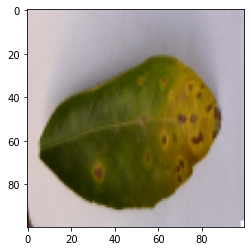

In [ ]:
plt.imshow(img2)

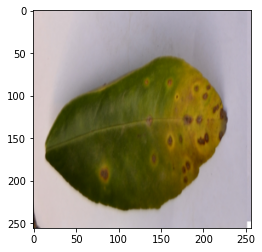

In [ ]:
plt.imshow(x_train[0])

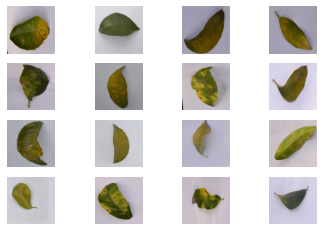

In [ ]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

In [ ]:
x_train = x_train / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train2 = to_categorical(y_train, 4)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing, Dropout
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Resizing(50,50))
model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 50, 50, 3)         0         
                                                                 
 flatten (Flatten)           (None, 7500)              0         
                                                                 
 dense (Dense)               (None, 50)                375050    
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 4)                 204       
                                                                 
Total params: 380,354
Trainable params: 380,354
Non-trai

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=10)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
),loss="categorical_crossentropy",metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=10)

Epoch 1/100
48/48 [==============================] - 1s 17ms/step - loss: 1.4671 - acc: 0.3411 - val_loss: 1.2856 - val_acc: 0.2941
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 1.3885 - acc: 0.3726 - val_loss: 1.3149 - val_acc: 0.3277
Epoch 3/100
48/48 [==============================] - 1s 10ms/step - loss: 1.2765 - acc: 0.4316 - val_loss: 1.2614 - val_acc: 0.4286
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 1.2202 - acc: 0.4421 - val_loss: 1.0694 - val_acc: 0.5210
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 1.1757 - acc: 0.4295 - val_loss: 1.0588 - val_acc: 0.5546
Epoch 6/100
48/48 [==============================] - 3s 60ms/step - loss: 1.1345 - acc: 0.4484 - val_loss: 1.0861 - val_acc: 0.4538
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 1.0379 - acc: 0.5263 - val_loss: 1.1155 - val_acc: 0.4790
Epoch 8/100
48/48 [==============================] - 0s 7ms/step - loss: 1.0342

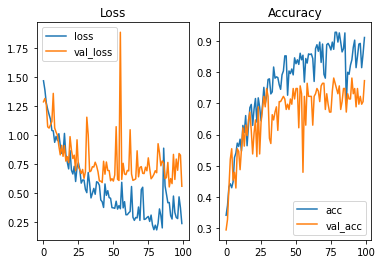

In [ ]:
plt.subplot(121);plt.title('Loss')
plt.plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.subplot(122);plt.title('Accuracy')
plt.plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
plt.legend(['acc','val_acc'])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop'
),loss="categorical_crossentropy",metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=10)

Epoch 1/100
48/48 [==============================] - 2s 19ms/step - loss: 0.8196 - acc: 0.7705 - val_loss: 1.8295 - val_acc: 0.4958
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4951 - acc: 0.8063 - val_loss: 1.7292 - val_acc: 0.5966
Epoch 3/100
48/48 [==============================] - 2s 43ms/step - loss: 0.6107 - acc: 0.8063 - val_loss: 0.5708 - val_acc: 0.7731
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.5193 - acc: 0.8147 - val_loss: 1.1853 - val_acc: 0.6134
Epoch 5/100
48/48 [==============================] - 3s 53ms/step - loss: 0.5474 - acc: 0.7979 - val_loss: 1.8743 - val_acc: 0.4370
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 0.4237 - acc: 0.8253 - val_loss: 1.0628 - val_acc: 0.6303
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.5115 - acc: 0.8232 - val_loss: 1.1400 - val_acc: 0.6387
Epoch 8/100
48/48 [==============================] - 0s 8ms/step - loss: 0.4513

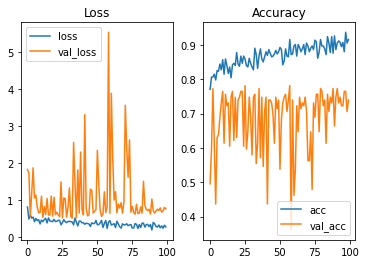

In [ ]:
plt.subplot(121);plt.title('Loss')
plt.plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.subplot(122);plt.title('Accuracy')
plt.plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
plt.legend(['acc','val_acc'])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.0,
    nesterov=False,
    name='SGD',
),loss=tf.keras.losses.MeanSquaredError(),metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=10)

Epoch 1/100
48/48 [==============================] - 3s 9ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.2884 - val_loss: 0.3655 - val_acc: 0.2689
Epoch 8/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3558 - a

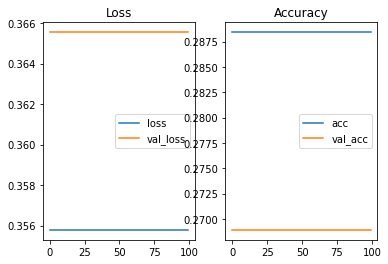

In [ ]:
plt.subplot(121);plt.title('Loss')
plt.plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.subplot(122);plt.title('Accuracy')
plt.plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
plt.legend(['acc','val_acc'])

#MLP 1D

In [ ]:
x_train.shape

(594, 256, 256, 3)

In [ ]:
Xtrain = x_train.reshape(-1, 28*28)

ValueError: ignored

#CNN

In [ ]:
num_classes = len(class_names)

model_cnn = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_44 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 25, 25, 16)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                

In [ ]:
epochs=100
history = model_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
15/15 [==============================] - 2s 37ms/step - loss: 1.4131 - accuracy: 0.2914 - val_loss: 1.3465 - val_accuracy: 0.3782
Epoch 2/100
15/15 [==============================] - 0s 23ms/step - loss: 1.3078 - accuracy: 0.3711 - val_loss: 1.2799 - val_accuracy: 0.3782
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1928 - accuracy: 0.4486 - val_loss: 1.1617 - val_accuracy: 0.4034
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0599 - accuracy: 0.4444 - val_loss: 1.0445 - val_accuracy: 0.4622
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0232 - accuracy: 0.5010 - val_loss: 1.0017 - val_accuracy: 0.5294
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9071 - accuracy: 0.5241 - val_loss: 1.0104 - val_accuracy: 0.4958
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8691 - accuracy: 0.5807 - val_loss: 0.9376 - val_accuracy: 0.6050
Epoch 8/100

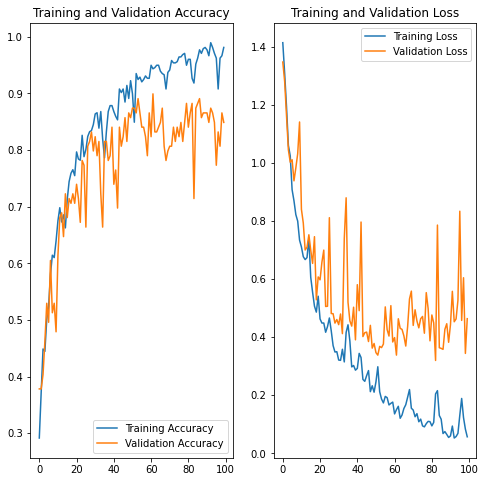

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#cnn vgg16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
num_classes = len(class_names)

model = Sequential()
model.add(Conv2D(64,(3,3), padding="same", activation="relu", input_shape=(img_height,img_width,3)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 conv2d_100 (Conv2D)         (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 25, 25, 128)       73856     
                                                                 
 conv2d_102 (Conv2D)         (None, 25, 25, 128)       147584    
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
15/15 [==============================] - 3s 139ms/step - loss: 1.3393 - accuracy: 0.3145 - val_loss: 1.2930 - val_accuracy: 0.2437
Epoch 2/50
15/15 [==============================] - 4s 222ms/step - loss: 1.2203 - accuracy: 0.3774 - val_loss: 1.1855 - val_accuracy: 0.4286
Epoch 3/50
15/15 [==============================] - 2s 142ms/step - loss: 1.1142 - accuracy: 0.4759 - val_loss: 1.1260 - val_accuracy: 0.4370
Epoch 4/50
15/15 [==============================] - 1s 64ms/step - loss: 1.0416 - accuracy: 0.4843 - val_loss: 1.0840 - val_accuracy: 0.4286
Epoch 5/50
15/15 [==============================] - 1s 50ms/step - loss: 0.9433 - accuracy: 0.4906 - val_loss: 0.9249 - val_accuracy: 0.4958
Epoch 6/50
15/15 [==============================] - 2s 152ms/step - loss: 0.8179 - accuracy: 0.5786 - val_loss: 1.0523 - val_accuracy: 0.4622
Epoch 7/50
15/15 [==============================] - 1s 50ms/step - loss: 0.8945 - accuracy: 0.5052 - val_loss: 0.8798 - val_accuracy: 0.6050
Epoch 8/5

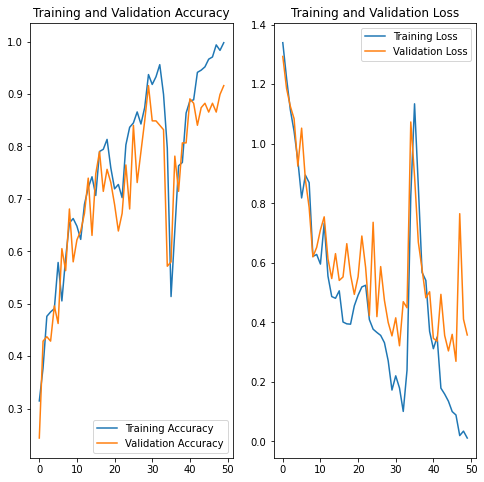

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#CNN 2 

In [ ]:
num_classes = len(class_names)

model_cnn = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                    

In [ ]:
epochs=100
history = model_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
15/15 [==============================] - 9s 45ms/step - loss: 1.4031 - accuracy: 0.2851 - val_loss: 1.3610 - val_accuracy: 0.2857
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3261 - accuracy: 0.3145 - val_loss: 1.2963 - val_accuracy: 0.4286
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 1.2239 - accuracy: 0.4382 - val_loss: 1.1722 - val_accuracy: 0.4622
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0874 - accuracy: 0.4843 - val_loss: 1.1027 - val_accuracy: 0.4790
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0645 - accuracy: 0.4885 - val_loss: 1.0847 - val_accuracy: 0.3866
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9842 - accuracy: 0.5262 - val_loss: 0.9684 - val_accuracy: 0.5882
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8794 - accuracy: 0.5556 - val_loss: 0.9462 - val_accuracy: 0.5630
Epoch 8/100


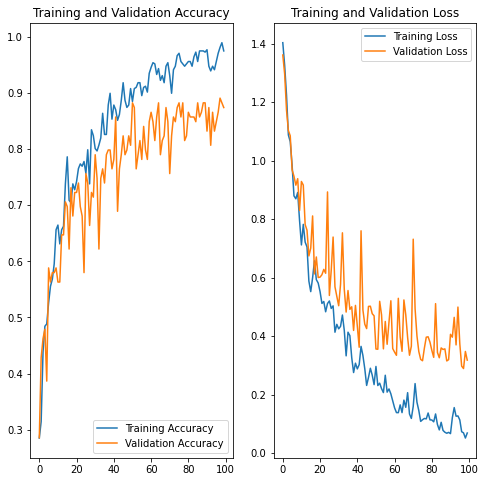

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model

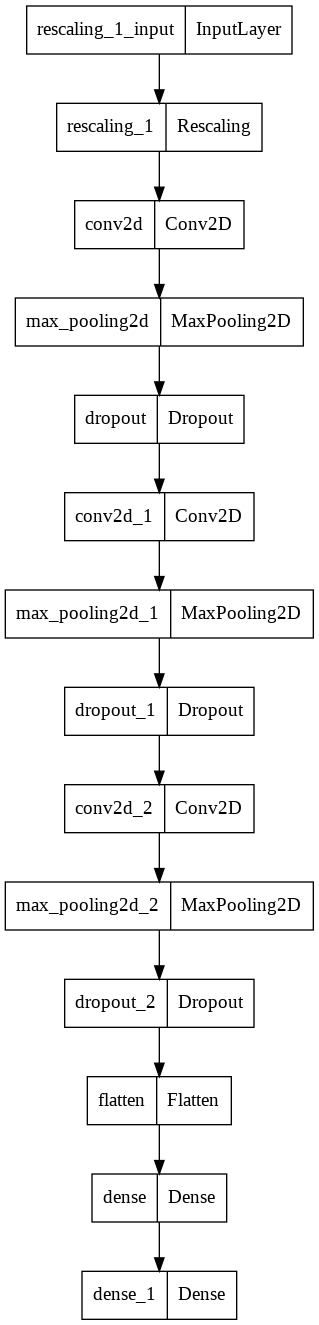

In [ ]:
plot_model(model_cnn)

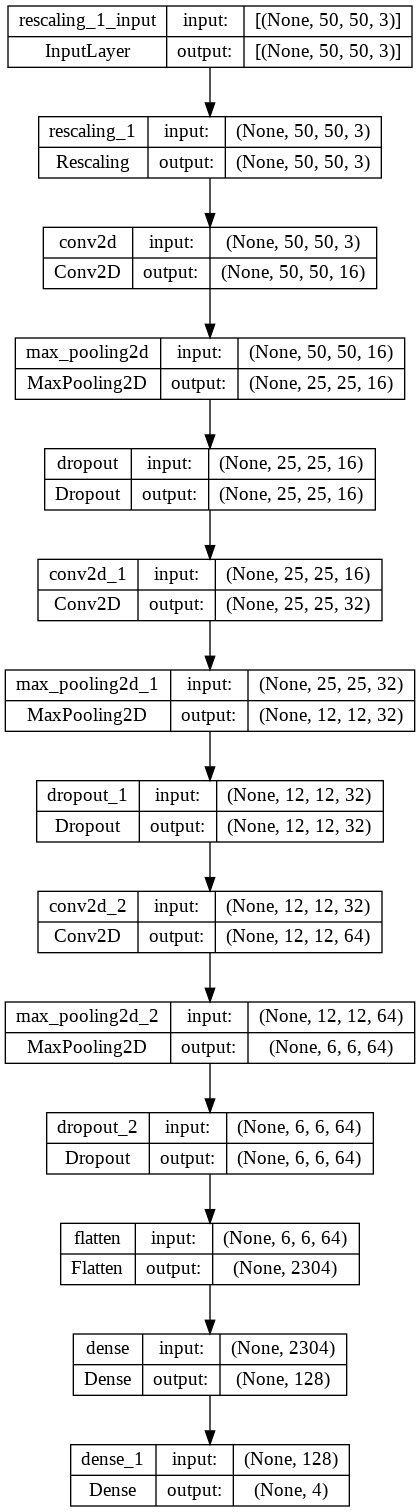

In [ ]:
plot_model(model_cnn, show_shapes= True)

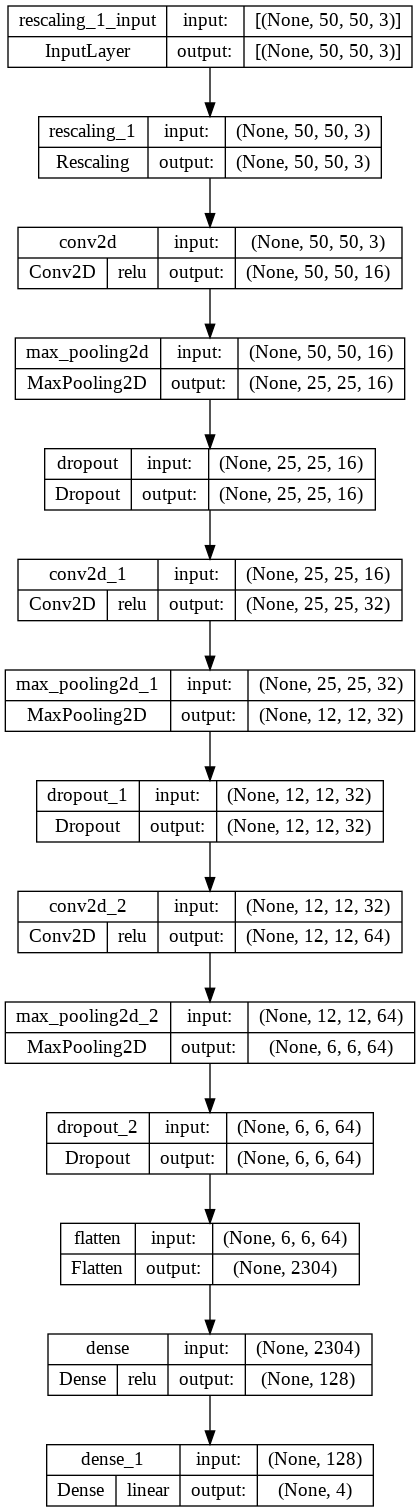

In [ ]:
plot_model(model_cnn, show_shapes= True, to_file= '/content/drive/MyDrive/SCIP_deep/HW3/modelCNN.png',rankdir='TE' ,
           expand_nested=True,show_dtype=False, show_layer_activations=True)

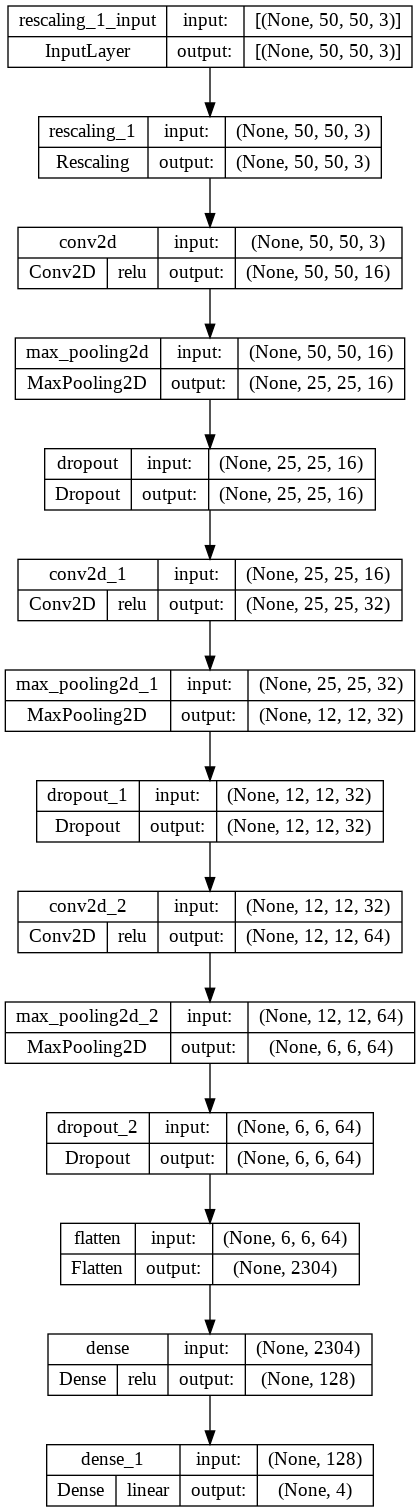

In [ ]:
plot_model(model_cnn, show_shapes= True, to_file= '/content/drive/MyDrive/SCIP_deep/HW3/modelCNN.png',rankdir='TE' ,
           expand_nested=False,show_dtype=False, show_layer_activations=True)